# Fig.4 Population frequency of cooperators by network degree

## ../data/20220507_092452/*.csv

```julia
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4, :random_4]
weak_selection_list = [true]
calc_payoffs_pattern_list = [1]
hop_game_list = [1]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
b_list = [5.0]
μ_list = [0.0]
δ_list = [1.0]
```

In [1]:
import glob
import numpy as np
import os
import pandas as pd
import seaborn as sns
sns.set(font_scale = 1.6, style = 'darkgrid')

In [2]:
DTYPES = {
    'network_type': 'category',
    'weak_selection': bool,
    'calc_payoffs_pattern': int,
    'hop_game': int,
    'hop_learning': int,
    'b': float,
    'μ': float,
    'δ': float,
    'trial': int,
    'step': int,
    'agent_id': int,
    'is_cooperator': int,
    'payoff': float,
    'degree': int
}

def load_df(csv_file_name: str) -> pd.DataFrame:
    return pd.read_csv(csv_file_name, header=None, names=DTYPES.keys(), dtype=DTYPES).groupby([
        'network_type',
        'hop_learning',
        'step',
        'degree'
    ]).agg({
        'is_cooperator': np.mean
    }).reset_index()

In [3]:
%%time
# Load (16min 53s → 12min 21s → 22min 41s)
dir_name = '20220507_092452'
file_list = glob.glob('../data/{}/*.csv'.format(dir_name))
print(file_list)

df_list = [load_df(file) for file in file_list]
df = pd.concat(df_list)
df

['../data/20220507_092452/97.csv', '../data/20220507_092452/83.csv', '../data/20220507_092452/68.csv', '../data/20220507_092452/6.csv', '../data/20220507_092452/54.csv', '../data/20220507_092452/40.csv', '../data/20220507_092452/41.csv', '../data/20220507_092452/7.csv', '../data/20220507_092452/55.csv', '../data/20220507_092452/69.csv', '../data/20220507_092452/82.csv', '../data/20220507_092452/96.csv', '../data/20220507_092452/80.csv', '../data/20220507_092452/94.csv', '../data/20220507_092452/43.csv', '../data/20220507_092452/57.csv', '../data/20220507_092452/5.csv', '../data/20220507_092452/56.csv', '../data/20220507_092452/4.csv', '../data/20220507_092452/42.csv', '../data/20220507_092452/95.csv', '../data/20220507_092452/81.csv', '../data/20220507_092452/85.csv', '../data/20220507_092452/91.csv', '../data/20220507_092452/46.csv', '../data/20220507_092452/52.csv', '../data/20220507_092452/1.csv', '../data/20220507_092452/53.csv', '../data/20220507_092452/47.csv', '../data/20220507_

,network_type,hop_learning,step,degree,is_cooperator
0,random_4,1,1,1,0.528846
1,random_4,1,1,2,0.559006
2,random_4,1,1,3,0.520958
3,random_4,1,1,4,0.471795
4,random_4,1,1,5,0.479167
...,...,...,...,...,...
1319995,scale_free_4,10,1000,74,NaN
1319996,scale_free_4,10,1000,77,NaN
1319997,scale_free_4,10,1000,80,NaN
1319998,scale_free_4,10,1000,86,NaN


In [7]:
# %%time
# sns.relplot(
#     data=df,
#     x='step',
#     y='is_cooperator',
#     row='network_type',
#     col='hop_learning',
#     kind='line'
# )

In [8]:
%%time
# df_degree_c_rate = df.groupby([
#     'network_type',
#     'hop_learning',
#     'degree'
# ]).agg({
#     'is_cooperator': np.mean
# }).reset_index()

df_degree_c_rate = df.groupby(['network_type', 'hop_learning']).corr().reset_index()
df_degree_c_rate = df_degree_c_rate[df_degree_c_rate.level_2 == 'degree'][['network_type', 'hop_learning', 'is_cooperator']].reset_index(drop=True)
df_degree_c_rate.columns = [
    'network_type',
    'hop_learning',
    'corr_degree_and_coop_rate'
]
df_degree_c_rate

CPU times: user 10.8 s, sys: 5.16 s, total: 15.9 s
Wall time: 17.2 s


,network_type,hop_learning,corr_degree_and_coop_rate
0,random_4,1,0.002901
1,random_4,2,0.013866
2,random_4,3,0.010060
3,random_4,4,0.005980
4,random_4,5,0.014122
5,random_4,6,0.014085
6,random_4,7,0.011002
7,random_4,8,-0.000244
8,random_4,9,-0.004068
9,random_4,10,-0.000365


CPU times: user 35.9 ms, sys: 2.13 ms, total: 38 ms
Wall time: 36.4 ms


<AxesSubplot:xlabel='hop_learning', ylabel='corr_degree_and_coop_rate'>

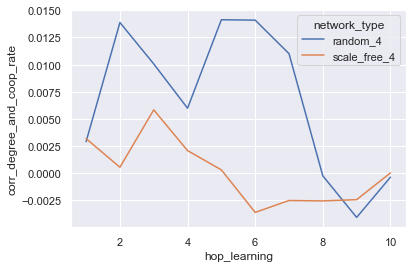

In [9]:
%%time
sns.set(font_scale = 1.0, style = 'darkgrid')
sns.lineplot(x='hop_learning', y='corr_degree_and_coop_rate', hue='network_type', data=df_degree_c_rate)